<a href="https://colab.research.google.com/github/oulbacha-ilyas/QALHATATech-ltd-Eye-Fixations-Prediction/blob/main/Fixations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Overview of the project :
Building a ML model that is able to track a pilot eye fixations in a typical environment (cockpit).
The results of this project suggest that contextualizing the model building to cockpit surfaces(ECAM,EFIS,PFD) generate models more accurate than the case of building models on data of entire flying cycle.
The ultimate objective is to be able to assimilate the flying path of a pilot and beeing able to compare it with another pilot.For this purpose,the comparison should be based on some metrics : duration spent on a surface,the number of times leaving and entering the surface,the position of fixations inside a surface....etc.All these metrics are compared to a typical flying behavior of an instructor or a recommended flying path.

In [2]:
import pandas as pd 
import numpy as np

#print("HERE WE GO")

#!/usr/bin/env python
# coding: utf-8

# In[1]:


# bias variance with 10 folds
#bias and variance if we increase the folds
#Select a random sample from the desired dataset iteratively
#reading the data set
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler 
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import statistics

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
dataset=pd.read_csv("/content/drive/MyDrive/QALHATA Fixations project/Datasets/fixations.csv")
dataset.head()

,section id,recording id,fixation id,start timestamp [ns],end timestamp [ns],duration [ms],fixation x [px],fixation y [px]
0,9d485631-d3e7-4b9e-9846-86c24d17cd85,12cadca8-c51a-4d86-af40-408bb0fd9381,1,1649868268232374069,1649868268384158069,151,237.883,461.977
1,9d485631-d3e7-4b9e-9846-86c24d17cd85,12cadca8-c51a-4d86-af40-408bb0fd9381,2,1649868268476134069,1649868269320080069,843,285.147,511.359
2,9d485631-d3e7-4b9e-9846-86c24d17cd85,12cadca8-c51a-4d86-af40-408bb0fd9381,3,1649868269604296069,1649868269824016069,219,664.579,428.656
3,9d485631-d3e7-4b9e-9846-86c24d17cd85,12cadca8-c51a-4d86-af40-408bb0fd9381,4,1649868270087945069,1649868270447963069,360,673.736,435.751
4,9d485631-d3e7-4b9e-9846-86c24d17cd85,12cadca8-c51a-4d86-af40-408bb0fd9381,5,1649868270476468069,1649868270852291069,375,631.719,367.296


In [35]:
dataset.describe()

,fixation id,start timestamp [ns],end timestamp [ns],duration [ms],fixation x [px],fixation y [px]
count,1023.000000,1.023000e+03,1.023000e+03,1023.000000,1023.000000,1023.000000
mean,512.000000,1.649869e+18,1.649869e+18,475.372434,573.489254,588.973796
std,295.458965,1.749428e+11,1.749531e+11,576.859891,134.203456,112.126256
min,1.000000,1.649868e+18,1.649868e+18,63.000000,151.086000,291.031000
25%,256.500000,1.649868e+18,1.649868e+18,216.000000,485.183500,490.695000
50%,512.000000,1.649869e+18,1.649869e+18,324.000000,537.795000,626.875000
75%,767.500000,1.649869e+18,1.649869e+18,542.000000,670.053000,661.868000
max,1023.000000,1.649869e+18,1.649869e+18,10239.000000,1026.711000,926.416000


In [6]:
dataset['section id'].unique()

array(['9d485631-d3e7-4b9e-9846-86c24d17cd85'], dtype=object)

In [7]:
dataset1=pd.read_csv("/content/drive/MyDrive/QALHATA Fixations project/Datasets/fixations-efis.csv")
dataset1.head()

dataset1['fixation detected on surface'].unique()
dataset1.head()


,section id,recording id,fixation id,start timestamp [ns],end timestamp [ns],duration [ms],fixation detected on surface,fixation x [normalized],fixation y [normalized]
0,23769acc-a80d-4c56-ba93-1084625cc5d0,55de2ded-00a2-4b06-b882-77fa8f646c10,6,1649866919905671731,1649866920717660731,811,False,4.762806,4.961652
1,23769acc-a80d-4c56-ba93-1084625cc5d0,55de2ded-00a2-4b06-b882-77fa8f646c10,7,1649866920737659731,1649866922762186731,2024,False,5.441315,3.905316
2,23769acc-a80d-4c56-ba93-1084625cc5d0,55de2ded-00a2-4b06-b882-77fa8f646c10,9,1649866923197524731,1649866925273674731,2076,False,5.267681,4.009141
3,23769acc-a80d-4c56-ba93-1084625cc5d0,55de2ded-00a2-4b06-b882-77fa8f646c10,15,1649866927137598731,1649866927329500731,191,False,4.976595,2.902912
4,23769acc-a80d-4c56-ba93-1084625cc5d0,55de2ded-00a2-4b06-b882-77fa8f646c10,18,1649866929293651731,1649866929997663731,704,False,4.588918,2.416806


In [40]:
dataset1.describe()

,fixation id,start timestamp [ns],end timestamp [ns],duration [ms],fixation x [normalized],fixation y [normalized]
count,361.000000,3.610000e+02,3.610000e+02,361.000000,361.000000,361.000000
mean,216.432133,1.649868e+18,1.649868e+18,651.108033,7.844511,1.855792
std,133.897064,4.810575e+11,4.809075e+11,924.290864,9.736671,2.203215
min,2.000000,1.649867e+18,1.649867e+18,60.000000,-139.659247,-2.581628
25%,93.000000,1.649868e+18,1.649868e+18,260.000000,5.388383,0.805619
50%,214.000000,1.649868e+18,1.649868e+18,379.000000,5.900951,2.078833
75%,334.000000,1.649868e+18,1.649868e+18,688.000000,10.130040,2.288127
max,455.000000,1.649869e+18,1.649869e+18,10239.000000,48.096793,20.475758


In [8]:
dataset2=pd.read_csv("/content/drive/MyDrive/QALHATA Fixations project/Datasets/fixations-ecam.csv")
dataset2.shape
dataset2['section id'].unique()
dataset2['fixation detected on surface'].unique()
dataset2.head()

,section id,recording id,fixation id,start timestamp [ns],end timestamp [ns],duration [ms],fixation detected on surface,fixation x [normalized],fixation y [normalized]
0,23769acc-a80d-4c56-ba93-1084625cc5d0,55de2ded-00a2-4b06-b882-77fa8f646c10,6,1649866919905671731,1649866920717660731,811,False,0.468095,-13.279045
1,23769acc-a80d-4c56-ba93-1084625cc5d0,55de2ded-00a2-4b06-b882-77fa8f646c10,7,1649866920737659731,1649866922762186731,2024,False,-2.183272,4.669978
2,23769acc-a80d-4c56-ba93-1084625cc5d0,55de2ded-00a2-4b06-b882-77fa8f646c10,9,1649866923197524731,1649866925273674731,2076,False,-2.529686,5.728261
3,23769acc-a80d-4c56-ba93-1084625cc5d0,55de2ded-00a2-4b06-b882-77fa8f646c10,15,1649866927137598731,1649866927329500731,191,False,-3.018129,2.550155
4,23769acc-a80d-4c56-ba93-1084625cc5d0,55de2ded-00a2-4b06-b882-77fa8f646c10,18,1649866929293651731,1649866929997663731,704,False,-3.443159,1.721847


In [9]:
dataset3=pd.read_csv("/content/drive/MyDrive/QALHATA Fixations project/Datasets/fixations-pfd.csv")
dataset3.shape
dataset3['section id'].unique()
dataset3['fixation detected on surface'].unique()
dataset3.head()

,section id,recording id,fixation id,start timestamp [ns],end timestamp [ns],duration [ms],fixation detected on surface,fixation x [normalized],fixation y [normalized]
0,23769acc-a80d-4c56-ba93-1084625cc5d0,55de2ded-00a2-4b06-b882-77fa8f646c10,6,1649866919905671731,1649866920717660731,811,False,0.925238,4.298973
1,23769acc-a80d-4c56-ba93-1084625cc5d0,55de2ded-00a2-4b06-b882-77fa8f646c10,7,1649866920737659731,1649866922762186731,2024,False,0.882185,1.482462
2,23769acc-a80d-4c56-ba93-1084625cc5d0,55de2ded-00a2-4b06-b882-77fa8f646c10,9,1649866923197524731,1649866925273674731,2076,False,0.621319,1.059059
3,23769acc-a80d-4c56-ba93-1084625cc5d0,55de2ded-00a2-4b06-b882-77fa8f646c10,15,1649866927137598731,1649866927329500731,191,False,-0.148711,0.479350
4,23769acc-a80d-4c56-ba93-1084625cc5d0,55de2ded-00a2-4b06-b882-77fa8f646c10,18,1649866929293651731,1649866929997663731,704,False,-0.972707,0.629921


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

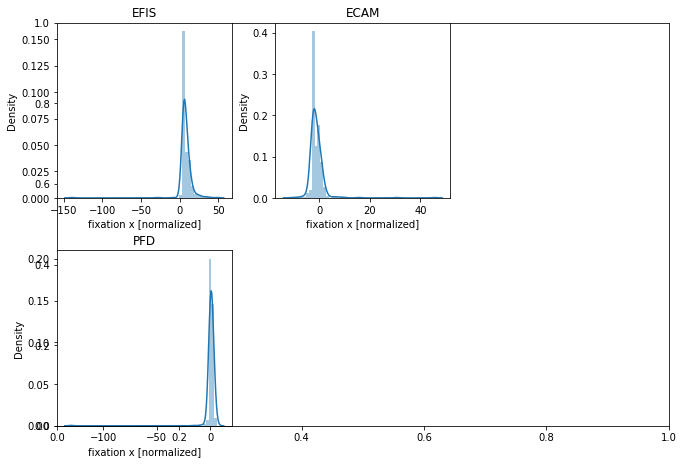

In [10]:
from matplotlib.pylab import title
from scipy.stats import shapiro
from scipy.stats import kstest
import matplotlib.gridspec as gridspec

import seaborn as sns

import scipy.stats as stats
import statsmodels.api as sm
import pylab as py

fig, axes = plt.subplots()
gs = gridspec.GridSpec(2, 3, figure=fig)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1, 0])


sns.distplot(dataset1['fixation x [normalized]'],ax=ax1).set(title="EFIS")
sns.distplot(dataset2['fixation x [normalized]'],ax=ax2).set(title="ECAM")
sns.distplot(dataset3['fixation x [normalized]'],ax=ax3).set(title="PFD")

fig.set_figheight(7)
fig.set_figwidth(10)

plt.subplots_adjust(left=0.05,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.25, 
                    hspace=0.3)


In [11]:
##### LR Model with all features

import operator

import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer


###Fixations
###set the table of comparison
results_lr=pd.DataFrame(columns=['Surface','RMSE Training','RMSE Testing','R²','Adjusted-R²'])

#####ALL SURFACES
X=dataset[["start timestamp [ns]","end timestamp [ns]","duration [ms]"]]
y=dataset["fixation x [px]"]

#split the data

X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.3, random_state=0)

sc= Normalizer()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)
model = LinearRegression()
model.fit(X_train,y_train)

#evaluate the model

y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)

# performance:
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
rmse_training=np.sqrt(mean_squared_error(y_train,y_pred_train))
correlation=LinearRegression()
correlation=correlation.fit(X,y)
r2= correlation.score(X,y)
adj_r2=1 - (1-r2)*(len(y)-1)/(len(y)-X_test.shape[1]-1)

results_lr=results_lr.append({'Surface':'ALL','RMSE Training':rmse_training,'RMSE Testing':rmse,'R²':r2,'Adjusted-R²':adj_r2},ignore_index=True)





###### SURFACE 1 EFIS
X=dataset1[["start timestamp [ns]","end timestamp [ns]","duration [ms]"]]
y=dataset1["fixation x [normalized]"]

#split the data

X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.3, random_state=0)

sc= Normalizer()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)
model = LinearRegression()
model.fit(X_train,y_train)

#evaluate the model

y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)

# performance:
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
rmse_training=np.sqrt(mean_squared_error(y_train,y_pred_train))
correlation=LinearRegression()
correlation=correlation.fit(X,y)
r2= correlation.score(X,y)
adj_r2=1 - (1-r2)*(len(y)-1)/(len(y)-X_test.shape[1]-1)

results_lr=results_lr.append({'Surface':'EFIS','RMSE Training':rmse_training,'RMSE Testing':rmse,'R²':r2,'Adjusted-R²':adj_r2},ignore_index=True)


##### SUFACE 2 ECAM
X=dataset2[["start timestamp [ns]","end timestamp [ns]","duration [ms]"]]
y=dataset2["fixation x [normalized]"]

#split the data

X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.3, random_state=0)

sc= Normalizer()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)
model = LinearRegression()
model.fit(X_train,y_train)

#evaluate the model

y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)

# performance:
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
rmse_training=np.sqrt(mean_squared_error(y_train,y_pred_train))
correlation=LinearRegression()
correlation=correlation.fit(X,y)
r2= correlation.score(X,y)
adj_r2=1 - (1-r2)*(len(y)-1)/(len(y)-X_test.shape[1]-1)

results_lr=results_lr.append({'Surface':'ECAM','RMSE Training':rmse_training,'RMSE Testing':rmse,'R²':r2,'Adjusted-R²':adj_r2},ignore_index=True)

####SURFACE 3 PFD

X=dataset3[["start timestamp [ns]","end timestamp [ns]","duration [ms]"]]
y=dataset3["fixation x [normalized]"]

#split the data

X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.3, random_state=0)

sc= Normalizer()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)
model = LinearRegression()
model.fit(X_train,y_train)

#evaluate the model

y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)

# performance:
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
rmse_training=np.sqrt(mean_squared_error(y_train,y_pred_train))
correlation=LinearRegression()
correlation=correlation.fit(X,y)
r2= correlation.score(X,y)
adj_r2=1 - (1-r2)*(len(y)-1)/(len(y)-X_test.shape[1]-1)

results_lr=results_lr.append({'Surface':'PFD','RMSE Training':rmse_training,'RMSE Testing':rmse,'R²':r2,'Adjusted-R²':adj_r2},ignore_index=True)

print(results_lr)




  Surface  RMSE Training  RMSE Testing        R²  Adjusted-R²
0     ALL     133.892835    135.137273  0.012550     0.009643
1    EFIS      10.922924      6.120366  0.004179    -0.004189
2    ECAM       3.608444      3.642367  0.042718     0.034673
3     PFD       1.796239     11.845803  0.023308     0.016197


In [12]:
###### Linear Regression with 1 Predictor (Duration)

import operator

import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer


###Fixations
###set the table of comparison
results_lr=pd.DataFrame(columns=['Surface','RMSE Training','RMSE Testing','R²','Adjusted-R²'])


### ALL SURFACES

X=dataset["duration [ms]"]
y=dataset["fixation x [px]"]

#split the data

X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.3, random_state=0)

sc= Normalizer()

X_train=X_train.values.reshape(-1,1)
X_test=X_test.values.reshape(-1,1)
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)
model = LinearRegression()
model.fit(X_train,y_train)

#evaluate the model

y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)

# performance:
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
rmse_training=np.sqrt(mean_squared_error(y_train,y_pred_train))
correlation=LinearRegression()
X=X.values.reshape(-1,1)

correlation=correlation.fit(X,y)
r2= correlation.score(X,y)
adj_r2=1 - (1-r2)*(len(y)-1)/(len(y)-X_test.shape[1]-1)

results_lr=results_lr.append({'Surface':'ALL','RMSE Training':rmse_training,'RMSE Testing':rmse,'R²':r2,'Adjusted-R²':adj_r2},ignore_index=True)



##### SURFACE  1 EFIS
X=dataset1["duration [ms]"]
y=dataset1["fixation x [normalized]"]

#split the data

X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.3, random_state=0)

sc= Normalizer()

X_train=X_train.values.reshape(-1,1)
X_test=X_test.values.reshape(-1,1)
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)
model = LinearRegression()
model.fit(X_train,y_train)

#evaluate the model

y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)

# performance:
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
rmse_training=np.sqrt(mean_squared_error(y_train,y_pred_train))
correlation=LinearRegression()
X=X.values.reshape(-1,1)

correlation=correlation.fit(X,y)
r2= correlation.score(X,y)
adj_r2=1 - (1-r2)*(len(y)-1)/(len(y)-X_test.shape[1]-1)

results_lr=results_lr.append({'Surface':'EFIS','RMSE Training':rmse_training,'RMSE Testing':rmse,'R²':r2,'Adjusted-R²':adj_r2},ignore_index=True)


#####SURFACE 2 ECAM
X=dataset2["duration [ms]"]
y=dataset2["fixation x [normalized]"]

#split the data

X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.3, random_state=0)

sc= Normalizer()
X_train=X_train.values.reshape(-1,1)
X_test=X_test.values.reshape(-1,1)
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)
model = LinearRegression()
model.fit(X_train,y_train)

#evaluate the model

y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)

# performance:
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
rmse_training=np.sqrt(mean_squared_error(y_train,y_pred_train))
correlation=LinearRegression()
X=X.values.reshape(-1,1)

correlation=correlation.fit(X,y)
r2= correlation.score(X,y)
adj_r2=1 - (1-r2)*(len(y)-1)/(len(y)-X_test.shape[1]-1)

results_lr=results_lr.append({'Surface':'ECAM','RMSE Training':rmse_training,'RMSE Testing':rmse,'R²':r2,'Adjusted-R²':adj_r2},ignore_index=True)


####SURFACE 3 PFD

X=dataset3["duration [ms]"]
y=dataset3["fixation x [normalized]"]

#split the data

X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.3, random_state=0)

sc= Normalizer()
X_train=X_train.values.reshape(-1,1)
X_test=X_test.values.reshape(-1,1)
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)
model = LinearRegression()
model.fit(X_train,y_train)

#evaluate the model

y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)

# performance:
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
rmse_training=np.sqrt(mean_squared_error(y_train,y_pred_train))
correlation=LinearRegression()
X=X.values.reshape(-1,1)

correlation=correlation.fit(X,y)
r2= correlation.score(X,y)
adj_r2=1 - (1-r2)*(len(y)-1)/(len(y)-X_test.shape[1]-1)

results_lr=results_lr.append({'Surface':'PFD','RMSE Training':rmse_training,'RMSE Testing':rmse,'R²':r2,'Adjusted-R²':adj_r2},ignore_index=True)

print(results_lr)




  Surface  RMSE Training  RMSE Testing            R²  Adjusted-R²
0     ALL     134.045072    134.387574  4.766746e-03     0.003792
1    EFIS      10.957256      5.984481  2.638470e-03    -0.000140
2    ECAM       3.629719      3.643423  3.795632e-03     0.001021
3     PFD       1.811452     11.834062  2.542855e-12    -0.002415


In [13]:
####### ANN model with  1 predictor




results_ann_fixations=pd.DataFrame(columns=['Surface','Training RMSE','Testing RMSE','Difference'])

####ALL SURFACES
X=dataset[["duration [ms]"]]
y=dataset["fixation x [px]"]

X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.3, random_state=0)

sc= Normalizer()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

model=MLPRegressor(activation='logistic',solver='lbfgs',max_iter=500000)
Fixation_position= model.fit(X_train,y_train)
y_pred_test =Fixation_position.predict(X_test)
y_pred_train =Fixation_position.predict(X_train)

rmse_test= np.sqrt(mean_squared_error(y_test,y_pred_test))
rmse_train= np.sqrt(mean_squared_error(y_train,y_pred_train))
Difference=rmse_train-rmse_test

results_ann_fixations=results_ann_fixations.append({"Surface":'ALL' ,"Training RMSE":rmse_train,"Testing RMSE":rmse_test,'Difference':Difference},ignore_index=True)

########SURFACE 1 EFIS
###["start timestamp [ns]","end timestamp [ns]","duration [ms]"]

X=dataset1[["duration [ms]"]]
y=dataset1["fixation x [normalized]"]

X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.3, random_state=0)

sc= Normalizer()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

model=MLPRegressor(activation='logistic',solver='lbfgs',max_iter=500000)
Fixation_position= model.fit(X_train,y_train)
y_pred_test =Fixation_position.predict(X_test)
y_pred_train =Fixation_position.predict(X_train)

rmse_test= np.sqrt(mean_squared_error(y_test,y_pred_test))
rmse_train= np.sqrt(mean_squared_error(y_train,y_pred_train))
Difference=rmse_train-rmse_test

results_ann_fixations=results_ann_fixations.append({"Surface":'EFIS' ,"Training RMSE":rmse_train,"Testing RMSE":rmse_test,'Difference':Difference},ignore_index=True)

####SURFACE 2 ECAM
X=dataset2[["duration [ms]"]]
y=dataset2["fixation x [normalized]"]

X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.3, random_state=0)

sc= Normalizer()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

model=MLPRegressor(activation='logistic',solver='lbfgs',max_iter=500000)
Fixation_position= model.fit(X_train,y_train)
y_pred_test =Fixation_position.predict(X_test)
y_pred_train =Fixation_position.predict(X_train)

rmse_test= np.sqrt(mean_squared_error(y_test,y_pred_test))
rmse_train= np.sqrt(mean_squared_error(y_train,y_pred_train))
Difference=rmse_train-rmse_test

results_ann_fixations=results_ann_fixations.append({"Surface":'ECAM',"Training RMSE":rmse_train,"Testing RMSE":rmse_test,'Difference':Difference},ignore_index=True)

####SURFACE 3 PFD

X=dataset3[["duration [ms]"]]
y=dataset3["fixation x [normalized]"]

X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.3, random_state=0)

sc= Normalizer()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

model=MLPRegressor(activation='logistic',solver='lbfgs',max_iter=500000)
Fixation_position= model.fit(X_train,y_train)
y_pred_test =Fixation_position.predict(X_test)
y_pred_train =Fixation_position.predict(X_train)

rmse_test= np.sqrt(mean_squared_error(y_test,y_pred_test))
rmse_train= np.sqrt(mean_squared_error(y_train,y_pred_train))
Difference=rmse_train-rmse_test

results_ann_fixations=results_ann_fixations.append({"Surface":"PFD","Training RMSE":rmse_train,"Testing RMSE":rmse_test,'Difference':Difference},ignore_index=True)

print(results_ann_fixations)


  Surface  Training RMSE  Testing RMSE  Difference
0     ALL     134.045072    134.387574   -0.342502
1    EFIS      10.957256      5.984481    4.972775
2    ECAM       3.629719      3.643420   -0.013701
3     PFD       1.811452     11.834062  -10.022610


In [56]:
#####Pilot flying behaviour

metrics=pd.DataFrame(columns=["Metric","Value"])
metrics['Metric']=["Flight Duration","Start","End","ECAM Cumulative Duration","EFIS Cumulative Duration","PFD Cumulative Duration","Min Duration","Maximum Duration"]
metrics.loc[0,"Value"]=dataset["duration [ms]"].sum()/1000
metrics.loc[1,"Value"]=dataset.loc[0,"start timestamp [ns]"]/1000000000
metrics.loc[2,"Value"]=dataset.loc[1022,"end timestamp [ns]"]/1000000000
metrics.loc[3,"Value"]=dataset1["duration [ms]"].sum()/1000
metrics.loc[4,"Value"]=dataset2["duration [ms]"].sum()/1000
metrics.loc[5,"Value"]=dataset3["duration [ms]"].sum()/1000
metrics.loc[6,"Value"]=dataset["duration [ms]"].min()/1000
metrics.loc[7,"Value"]=dataset["duration [ms]"].max()/1000

metrics.style.set_caption("Entire Path Metrics")
print(metrics)


                     Metric              Value
0           Flight Duration            486.306
1                     Start  1649868268.232374
2                       End  1649868864.327044
3  ECAM Cumulative Duration             235.05
4  EFIS Cumulative Duration             235.05
5   PFD Cumulative Duration            280.632
6              Min Duration              0.063
7          Maximum Duration             10.239


In [57]:

metrics_ecam=pd.DataFrame(columns=["Metric","Value"])
metrics_ecam['Metric']=["Cumulative Duration","Start","End","Average Duration","Min Duration","Maximum Duration"]
metrics_ecam.loc[0,"Value"]=dataset1["duration [ms]"].sum()/1000
metrics_ecam.loc[1,"Value"]=dataset1.loc[0,"start timestamp [ns]"]/1000000000
metrics_ecam.loc[2,"Value"]=dataset1.loc[360,"end timestamp [ns]"]/1000000000
metrics_ecam.loc[3,"Value"]=dataset1["duration [ms]"].mean()/1000
metrics_ecam.loc[4,"Value"]=dataset1["duration [ms]"].min()/1000
metrics_ecam.loc[5,"Value"]=dataset1["duration [ms]"].max()/1000
metrics_ecam.style.set_caption("ECAM Metrics")
print(metrics_ecam)

                Metric              Value
0  Cumulative Duration             235.05
1                Start  1649866919.905672
2                  End  1649868538.796675
3     Average Duration           0.651108
4         Min Duration               0.06
5     Maximum Duration             10.239
